In [43]:
import pandas as pd

In [44]:
pip install openpyxl
pip install numpy matplotlib seaborn

SyntaxError: invalid syntax (1639031445.py, line 1)

In [ ]:
data = pd.read_excel('C:/Users/HP15s/Desktop/HSE/Реестр.xlsx', header=None)

C:\Users\HP15s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
data_without_header = data.drop([0,1])
new_header = data_without_header.iloc[0]
data_new_header = data_without_header.drop(2)
data_new_header.columns = new_header
df_reset = data_new_header.reset_index(drop=True)
df_builder=df_reset[(df_reset['Тип субъекта'] == 'Юридическое лицо') & (df_reset['Категория'] != 'Не является субъектом МСП') & (df_reset['Основной вид деятельности'] == '41.20 Строительство жилых и нежилых зданий')].reset_index(drop=True)
df_builder

2,№ п/п,Наименование / ФИО,Тип субъекта,Категория,ОГРН,ИНН,Основной вид деятельности,Регион,Район,Город,...,Дата исключения из реестра,Телефон,E-mail,WWW,Наличие лицензий,"Наличие заключенных договоров, контрактов","Производство инновационной, высокотехнологичной продукции",Участие в программах партнерства,Является социальным предприятием,Среднесписочная численность работников за предшествующий календарный год
0,4,"""БАЗИС"" ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ",Юридическое лицо,Микропредприятие,1025204411682,5263025484,41.20 Строительство жилых и нежилых зданий,52 - Нижегородская область,NaN,г Нижний Новгород,...,NaN,NaN,NaN,NaN,Нет,Нет,Нет,Нет,Нет,1
1,6,"""БЕРЕГ"" ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ",Юридическое лицо,Микропредприятие,1035010950633,5056003490,41.20 Строительство жилых и нежилых зданий,50 - Московская область,NaN,г Люберцы,...,NaN,NaN,NaN,NaN,Нет,Нет,Нет,Нет,Нет,2
2,7,"""БРИГ-С"" ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ",Юридическое лицо,Микропредприятие,1022501801343,2537042746,41.20 Строительство жилых и нежилых зданий,25 - Приморский край,NaN,г Владивосток,...,NaN,NaN,NaN,NaN,Нет,Нет,Нет,Нет,Нет,1
3,9,"""ВИРАЖ-2000"" ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕ...",Юридическое лицо,Микропредприятие,1022501797768,2537036693,41.20 Строительство жилых и нежилых зданий,25 - Приморский край,NaN,г Владивосток,...,NaN,NaN,NaN,NaN,Нет,Нет,Нет,Нет,Нет,3
4,14,"""ДОКАСТР"" ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННО...",Юридическое лицо,Микропредприятие,1032501797305,2537045144,41.20 Строительство жилых и нежилых зданий,25 - Приморский край,NaN,г Владивосток,...,NaN,NaN,NaN,NaN,Нет,Нет,Нет,Нет,Нет,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142925,580135,"ФИРМА ""Ц.М.ХОЛДИНГ"" ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТ...",Юридическое лицо,Малое предприятие,1020700539640,0702005585,41.20 Строительство жилых и нежилых зданий,07 - Кабардино-Балкарская Республика,Зольский р-н,NaN,...,NaN,NaN,NaN,NaN,Нет,Нет,Нет,Нет,Нет,11
142926,580136,"ФИРМА ""ЭЛЬБРУС"" ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТС...",Юридическое лицо,Микропредприятие,1022303278106,2322017860,41.20 Строительство жилых и нежилых зданий,23 - Краснодарский край,Туапсинский р-н,г Туапсе,...,NaN,NaN,NaN,NaN,Нет,Нет,Нет,Нет,Нет,1
142927,580138,"ФИРМА ""ЮГ-ТРАНС"" ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТ...",Юридическое лицо,Микропредприятие,1022303277468,2322020781,41.20 Строительство жилых и нежилых зданий,23 - Краснодарский край,Туапсинский р-н,г Туапсе,...,NaN,NaN,NaN,NaN,Да,Нет,Нет,Нет,Нет,12
142928,580139,"ФИРМА ""ЮГ"" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕН...",Юридическое лицо,Микропредприятие,1022002548864,2015000021,41.20 Строительство жилых и нежилых зданий,20 - Чеченская Республика,NaN,г Грозный,...,NaN,NaN,NaN,NaN,Нет,Нет,Нет,Нет,Нет,1


Беру случайную выборку из данных (10% от всех данных) для снижения времени их обработки

In [ ]:
sample_frac = df_builder.sample(frac=0.1)

Парсим данные для расчета EBIT

In [ ]:
import requests
session = requests.Session()
session.headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/138.0.0.0 Safari/537.36'
}

# Создаем список для хранения результатов
org_data = []

# Парсим данные для каждой компании 
for inn in sample_frac['ИНН']:
    search_url = f"https://bo.nalog.gov.ru/advanced-search/organizations/search?query={inn}&page=0&size=20"
    values = session.get(search_url).json()
    if values:
        org_data.append(values)

In [ ]:
id_list=[]
for i in org_data:
    org_id=i['content']
    for k in org_id:
        if k['id']:
            id_list.append(k['id'])
id_list

[12221241,
 4716825,
 9987935,
 10111834,
 5920164,
 11291265,
 12416555,
 11942471,
 11048447,
 11823157,
 1080874,
 9124440,
 9791281,
 7960734,
 9327622,
 12101381,
 11550691,
 11927963,
 12216903,
 9617889,
 2502466,
 11439510,
 11466549,
 11359035,
 11311191,
 11810173,
 10849089,
 8535055,
 11399863,
 6587316,
 3631661,
 9189600,
 11992435,
 11347815,
 12399582,
 9977086,
 9265538,
 12137497,
 9548240,
 11613720,
 8120013,
 2985332,
 8778700,
 10965773,
 11696323,
 12119677,
 7828166,
 12263979,
 11762738,
 10497126,
 11424384,
 12207629,
 12007856,
 11073533,
 658250,
 10805621,
 10949759,
 10425452,
 11893730,
 11909393,
 9842943,
 9640786,
 9429303,
 5402867,
 12053766,
 58418,
 6188586,
 1529681,
 3718915,
 4267747,
 12091233,
 12317276,
 6231971,
 11690621,
 9769330,
 11909992,
 9314041,
 10993103,
 8213048,
 371727,
 12122412,
 12420813,
 10100243,
 9667732,
 12220622,
 8979625,
 11388198,
 11867191,
 12075173,
 12192482,
 9593246,
 10551852,
 9718775,
 9059495,
 11328765,


In [ ]:
import json
financial_data={}
for org_id in id_list:
    url = f"https://bo.nalog.gov.ru/nbo/organizations/{org_id}/bfo"
    try:
        response = session.get(url)
        response.raise_for_status()
        company_data = response.json()

        # Список для хранения EBIT по годам
        ebit_by_year = []

        # Обрабатываем данные по каждому году
        for year_data in company_data:
            try:
                financials = year_data['typeCorrections'][0]['correction']['financialResult']
                
                # Получаем финансовые показатели
                taxes = financials.get('current2410', 0)
                other_income = financials.get('current2340', 0)
                other_expenses = financials.get('current2350', 0)
                interest_expense = financials.get('current2330', 0)
                net_profit = financials.get('current2400', 0)
                revenue=financials.get('current2110', 0)
                operating_expenses = financials.get('current2120', 0)
                
                # Рассчитываем EBIT
                ebit = (net_profit+taxes - other_income + other_expenses + interest_expense)
                
                # Добавляем результат для текущего года
                ebit_by_year.append({
                    'year': year_data['period'],
                    'income': revenue,
                    'interest_expense':interest_expense,
                    'operating_expenses':operating_expenses,
                    'ebit': ebit,
                    'taxes': taxes,
                    'net_profit': net_profit
                })
                
            except (KeyError, IndexError) as e:
                print(f"Ошибка при обработке года для организации {org_id}: {e}")
                continue
        
        # Если есть данные по EBIT, сохраняем результаты
        if ebit_by_year:
            # Получаем информацию об организации
            org_info = company_data[0].get('organizationInfo', {}) or {}
            
            # Сохраняем все данные по организации
            financial_data[org_id] = {
                'company_name': org_info.get('fullName', 'Название не указано'),
                'inn': org_info.get('inn', 'ИНН не указан'),
                'ebit_by_year': ebit_by_year
            }
            
    except requests.exceptions.RequestException as e:
        print(f"Ошибка при запросе данных для организации {org_id}: {e}")
    except json.JSONDecodeError:
        print(f"Ошибка декодирования JSON для организации {org_id}")
    except Exception as e:
        print(f"Неизвестная ошибка при обработке организации {org_id}: {str(e)}")
    
    

Ошибка при обработке года для организации 11073533: 'financialResult'
Ошибка при обработке года для организации 11376822: 'financialResult'
Ошибка при обработке года для организации 11376822: 'financialResult'
Ошибка при обработке года для организации 11376822: 'financialResult'
Ошибка при обработке года для организации 11636162: 'financialResult'
Ошибка при обработке года для организации 11636162: 'financialResult'
Ошибка при обработке года для организации 11636162: 'financialResult'
Ошибка при обработке года для организации 320888: 'financialResult'
Ошибка при обработке года для организации 320888: 'financialResult'
Ошибка при обработке года для организации 320888: 'financialResult'
Ошибка при обработке года для организации 320888: 'financialResult'
Ошибка при обработке года для организации 12120513: 'financialResult'
Ошибка при обработке года для организации 12120513: 'financialResult'
Ошибка при обработке года для организации 874573: 'financialResult'
Ошибка при обработке года для 

In [ ]:
financial_data

{12221241: {'company_name': 'Общество с ограниченной ответственностью "ГЛАВРЕМСТРОЙ"',
  'inn': '9701254063',
  'ebit_by_year': [{'year': '2024',
    'income': 18849.0,
    'interest_expense': 0,
    'operating_expenses': 18417.0,
    'ebit': 432.0,
    'taxes': 81.0,
    'net_profit': 305.0},
   {'year': '2023',
    'income': 2699.0,
    'interest_expense': 0,
    'operating_expenses': 2401.0,
    'ebit': 188.0,
    'taxes': -55.0,
    'net_profit': 221.0}]},
 4716825: {'company_name': 'Общество с ограниченной ответственностью "Фасад Мастер"',
  'inn': '6671316758',
  'ebit_by_year': [{'year': '2024',
    'income': 29143.0,
    'interest_expense': 0.0,
    'operating_expenses': 28506.0,
    'ebit': 637.0,
    'taxes': 41.0,
    'net_profit': 161.0},
   {'year': '2023',
    'income': 23116.0,
    'interest_expense': 0.0,
    'operating_expenses': 22922.0,
    'ebit': 194.0,
    'taxes': 27.0,
    'net_profit': 135.0},
   {'year': '2022',
    'income': 2691.0,
    'interest_expense': 0.

Создаем датафрейм, где по каждой компании из выборки будут представлены по разным годам данные показателя EBIT

In [ ]:
ebit_df = pd.DataFrame([(k, *item.values()) for k,v in financial_data.items() 
                       for item in v['ebit_by_year']],
                      columns=['ID','year','income','interest_expense','operating_expenses','ebit','taxes','net_profit'])
ebit_df

,ID,year,income,interest_expense,operating_expenses,ebit,taxes,net_profit
0,12221241,2024,18849.0,0.0,18417.0,432.0,81.0,305.0
1,12221241,2023,2699.0,0.0,2401.0,188.0,-55.0,221.0
2,4716825,2024,29143.0,0.0,28506.0,637.0,41.0,161.0
3,4716825,2023,23116.0,0.0,22922.0,194.0,27.0,135.0
4,4716825,2022,2691.0,0.0,2706.0,-15.0,0.0,0.0
...,...,...,...,...,...,...,...,...
51524,9116884,2024,245188.0,0.0,242622.0,2566.0,0.0,-3023.0
51525,9116884,2023,176417.0,0.0,161491.0,14926.0,2103.0,3023.0
51526,9116884,2022,317789.0,0.0,310172.0,7617.0,1491.0,5901.0
51527,9116884,2021,205430.0,0.0,200446.0,4984.0,1105.0,4289.0


Смотрим на статистические данные по каждому году среднего и медианы

In [ ]:
# Средний EBIT по годам
trend = ebit_df.groupby('year')['ebit'].agg(['mean','median','count'])
print(trend)

             mean  median  count
year                            
2020  2536.076668    54.0   8752
2021  2061.316336    44.0   9825
2022  3426.093305    40.0  10964
2023  4479.434544    48.0  11313
2024  6661.518126    68.0  10675


По этим данным можно увидеть, что в 2021 году в среднем снизился показатель EBIT в строительной сфере в сравнении с 2020 годом. Если смотреть медианные значенияя (они устойчивы к выбросам), то можно заметить, что в 2022 году показатель тоже падает, а потом идёт восходящий тренд. В 2024 году EBIT сильно увеличился, хотя при этом количество компаний, функционирующих в этой сфере уменьштлось (до 
этого росло). Возможно, это произошло из-за того, что многие компании, которые испытывали трудности в функционировании на рфнке ушди с него, а на рынке остались более устоичивые компании, изз-за чего средний показатель значительно вырос.

Рассчитаем рентабельность компаний по показателю EBIT

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

ebit_df['EBIT Margin']=ebit_df['ebit']/ebit_df['income']
ebit_df


,ID,year,income,interest_expense,operating_expenses,ebit,taxes,net_profit,EBIT Margin
0,12221241,2024,18849.0,0.0,18417.0,432.0,81.0,305.0,0.022919
1,12221241,2023,2699.0,0.0,2401.0,188.0,-55.0,221.0,0.069655
2,4716825,2024,29143.0,0.0,28506.0,637.0,41.0,161.0,0.021858
3,4716825,2023,23116.0,0.0,22922.0,194.0,27.0,135.0,0.008392
4,4716825,2022,2691.0,0.0,2706.0,-15.0,0.0,0.0,-0.005574
...,...,...,...,...,...,...,...,...,...
51524,9116884,2024,245188.0,0.0,242622.0,2566.0,0.0,-3023.0,0.010465
51525,9116884,2023,176417.0,0.0,161491.0,14926.0,2103.0,3023.0,0.084606
51526,9116884,2022,317789.0,0.0,310172.0,7617.0,1491.0,5901.0,0.023969
51527,9116884,2021,205430.0,0.0,200446.0,4984.0,1105.0,4289.0,0.024261


Для более детального анализа посмотрим на динамику рентабельности в данной сфере с 2020 по 2024 гг. 

Сравним 2020 год с 2021

In [48]:
df_20_21 = ebit_df[ebit_df['year'].isin(['2020', '2021'])].copy()

# Удаление бесконечных значений (если income = 0)
df_20_21.replace([np.inf, -np.inf], np.nan, inplace=True)
df_20_21.dropna(subset=['EBIT Margin'], inplace=True)

df_20_21[df_20_21['year']=='2020'].describe()


,ID,income,interest_expense,operating_expenses,ebit,taxes,net_profit,EBIT Margin
count,6.281000e+03,6.281000e+03,6281.000000,6.281000e+03,6.281000e+03,6281.000000,6.281000e+03,6281.000000
mean,8.169407e+06,5.510496e+04,461.316829,4.633358e+04,3.521521e+03,-91.842382,1.320406e+03,-2.026216
std,3.207785e+06,2.248169e+05,7794.998120,1.810691e+05,5.340251e+04,6392.311800,3.458475e+04,135.959237
min,4.326000e+03,1.000000e+00,-14842.000000,-1.069227e+06,-4.895260e+05,-200971.000000,-1.733896e+06,-10757.692308
25%,6.567129e+06,2.530000e+03,0.000000,1.531000e+03,2.000000e+01,-17.000000,9.000000e+00,0.004796
50%,9.352719e+06,1.030500e+04,0.000000,8.055000e+03,2.720000e+02,1.000000,1.800000e+02,0.030938
75%,1.064400e+07,3.754000e+04,0.000000,3.049300e+04,1.542000e+03,85.000000,1.134000e+03,0.106772
max,1.146878e+07,1.259171e+07,465118.000000,8.642789e+06,3.677657e+06,357927.000000,7.119530e+05,39.904762


In [49]:
df_20_21[df_20_21['year']=='2021'].describe()

,ID,income,interest_expense,operating_expenses,ebit,taxes,net_profit,EBIT Margin
count,6.856000e+03,6.856000e+03,6856.000000,6.856000e+03,6.856000e+03,6856.000000,6.856000e+03,6856.000000
mean,8.511526e+06,5.945782e+04,457.851225,5.038589e+04,3.144737e+03,-69.865811,1.950608e+03,0.412752
std,3.212632e+06,2.358699e+05,7309.691185,1.970904e+05,4.296373e+04,5514.834843,3.744941e+04,90.160216
min,4.326000e+03,-6.390000e+02,-1191.000000,-8.452860e+05,-4.428980e+05,-210858.000000,-1.337813e+06,-1244.000000
25%,7.423212e+06,2.868750e+03,0.000000,1.885500e+03,2.200000e+01,-17.000000,1.200000e+01,0.004067
50%,9.693348e+06,1.161900e+04,0.000000,9.106000e+03,3.055000e+02,3.000000,2.060000e+02,0.030231
75%,1.094956e+07,4.425625e+04,0.000000,3.672525e+04,1.738250e+03,107.250000,1.291250e+03,0.100447
max,1.185320e+07,1.356902e+07,327641.000000,9.980406e+06,3.168070e+06,281748.000000,1.655496e+06,7296.317460


Сравнивая статистические показатели 2020 и 2021 гг., можно увидеть, что кванитили (устойчивые к выбросам) не претерпели значимых изменений в 2021 году.

Создадим функцию, которая будет убирать выбросы, для построения читаемых графиков.

In [16]:
def remove_outliers_percentile(df, column, lower=5, upper=95):
    """
    Удаляет значения за пределами перцентилей
    """
    lower_bound = np.percentile(df[column], lower)
    upper_bound = np.percentile(df[column], upper)
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Пример использования
cleaned_df_20_21 = remove_outliers_percentile(df_20_21, 'EBIT Margin')




C:\Users\HP15s\AppData\Local\Temp\ipykernel_6624\1566097329.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{x:.0%}" for x in ax.get_xticks()])


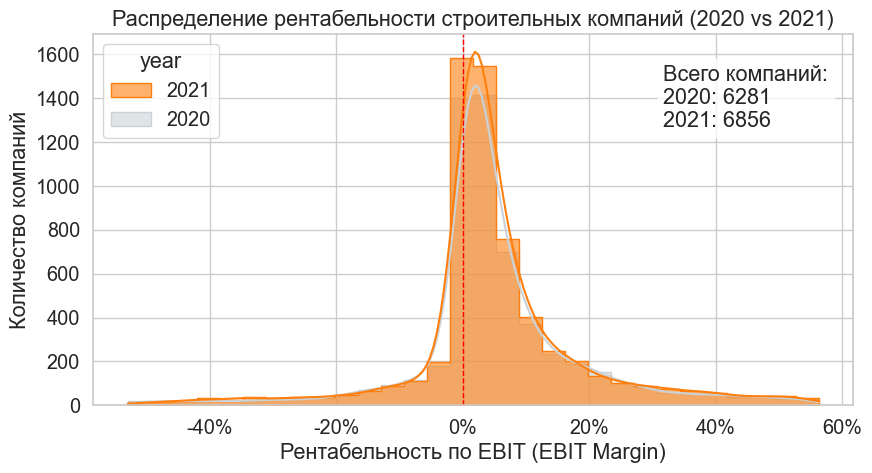

In [17]:
# Настройка стиля и создание графика
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(9, 5))
    ax = sns.histplot(
        data=cleaned_df_20_21,
        x='EBIT Margin',
        hue='year',
        bins=30,
        kde=True,
        alpha=0.6,
        palette=['#ff7f0e',"#cad2d7" ],  # Синий для 2020, оранжевый для 2021
        element='step'  # Четкие границы столбцов
    )
    
    # Настройка осей и заголовка
    ax.set(
        xlabel='Рентабельность по EBIT (EBIT Margin)',
        ylabel='Количество компаний',
        title='Распределение рентабельности строительных компаний (2020 vs 2021)'
    )
    
    # Добавляем вертикальную линию для нулевой рентабельности
    plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
    
    # Форматирование оси X в процентах
    ax.set_xticklabels([f"{x:.0%}" for x in ax.get_xticks()])
    
    # Добавляем аннотацию с количеством компаний
    plt.text(
        x=0.75, y=0.75,
        s=f"Всего компаний:\n2020: {len(df_20_21[df_20_21['year']=='2020'])}\n2021: {len(df_20_21[df_20_21['year']=='2021'])}",
        transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.8)
    )

plt.tight_layout()
plt.show()

По данному графику видно, что в целом распределение рентабельности компаний в 2021 году не изменилось. У большинства она состовляет от 0% до 5%. Количество комапний, имеющих отрицаетльную рентабельность, небольшое.

Сравнение 2022 года с 2021

In [50]:
df_21_22 = ebit_df[ebit_df['year'].isin(['2021', '2022'])].copy()

# Удаление бесконечных значений (если income = 0)
df_21_22.replace([np.inf, -np.inf], np.nan, inplace=True)
df_21_22.dropna(subset=['EBIT Margin'], inplace=True)
df_21_22[df_21_22['year']=='2021'].describe()

,ID,income,interest_expense,operating_expenses,ebit,taxes,net_profit,EBIT Margin
count,6.856000e+03,6.856000e+03,6856.000000,6.856000e+03,6.856000e+03,6856.000000,6.856000e+03,6856.000000
mean,8.511526e+06,5.945782e+04,457.851225,5.038589e+04,3.144737e+03,-69.865811,1.950608e+03,0.412752
std,3.212632e+06,2.358699e+05,7309.691185,1.970904e+05,4.296373e+04,5514.834843,3.744941e+04,90.160216
min,4.326000e+03,-6.390000e+02,-1191.000000,-8.452860e+05,-4.428980e+05,-210858.000000,-1.337813e+06,-1244.000000
25%,7.423212e+06,2.868750e+03,0.000000,1.885500e+03,2.200000e+01,-17.000000,1.200000e+01,0.004067
50%,9.693348e+06,1.161900e+04,0.000000,9.106000e+03,3.055000e+02,3.000000,2.060000e+02,0.030231
75%,1.094956e+07,4.425625e+04,0.000000,3.672525e+04,1.738250e+03,107.250000,1.291250e+03,0.100447
max,1.185320e+07,1.356902e+07,327641.000000,9.980406e+06,3.168070e+06,281748.000000,1.655496e+06,7296.317460


In [51]:
df_21_22[df_21_22['year']=='2022'].describe()

,ID,income,interest_expense,operating_expenses,ebit,taxes,net_profit,EBIT Margin
count,7.438000e+03,7.438000e+03,7438.000000,7.438000e+03,7.438000e+03,7438.000000,7.438000e+03,7438.000000
mean,8.872359e+06,7.266476e+04,638.777091,6.175250e+04,5.107991e+03,-232.118177,4.613867e+03,-0.758965
std,3.215521e+06,3.743704e+05,10858.822368,2.902547e+05,8.784810e+04,9525.732883,7.843929e+04,23.836301
min,4.326000e+03,-8.498000e+03,-1446.000000,-6.564060e+05,-4.889360e+05,-567118.000000,-5.244320e+05,-944.666667
25%,7.998439e+06,3.288500e+03,0.000000,2.473500e+03,2.900000e+01,-17.000000,1.700000e+01,0.004494
50%,1.007929e+07,1.409100e+04,0.000000,1.117950e+04,3.480000e+02,6.000000,2.370000e+02,0.030664
75%,1.127834e+07,5.240000e+04,0.000000,4.492150e+04,2.132750e+03,130.000000,1.513750e+03,0.104242
max,1.209899e+07,2.185339e+07,469148.000000,1.793571e+07,6.831737e+06,130394.000000,5.266992e+06,882.542373


По статистическим показателям за 2021 и 2022 гг. видно, что они не претерпели сильных изенений (квантили -- устойчивые к выбросам), но при этом они немного выросли (примерно на 0,04-0,4%).

C:\Users\HP15s\AppData\Local\Temp\ipykernel_6624\644576825.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{x:.0%}" for x in ax.get_xticks()])


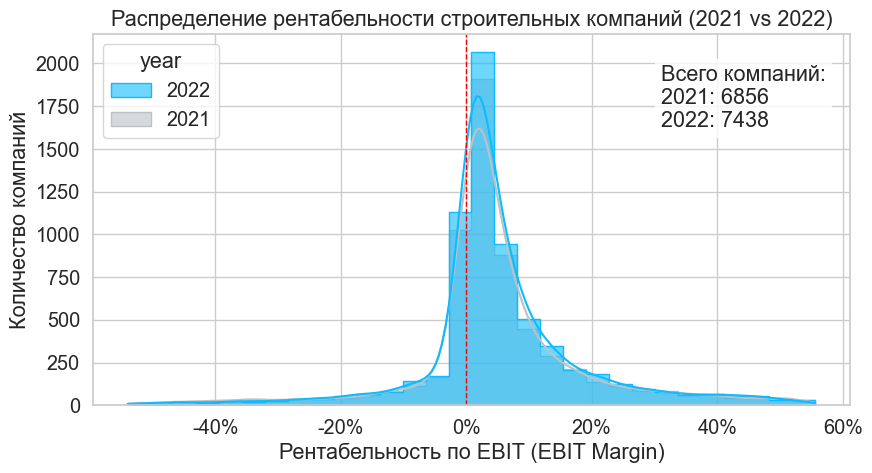

In [19]:
cleaned_df_21_22 = remove_outliers_percentile(df_21_22, 'EBIT Margin')
# Настройка стиля и создание графика
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(9, 5))
    ax = sns.histplot(
        data=cleaned_df_21_22,
        x='EBIT Margin',
        hue='year',
        bins=30,
        kde=True,
        alpha=0.6,
        palette=["#0ebbff", "#bcc1c5"],  # Синий для 2020, оранжевый для 2021
        element='step'  # Четкие границы столбцов
    )
    
    # Настройка осей и заголовка
    ax.set(
        xlabel='Рентабельность по EBIT (EBIT Margin)',
        ylabel='Количество компаний',
        title='Распределение рентабельности строительных компаний (2021 vs 2022)'
    )
    
    # Добавляем вертикальную линию для нулевой рентабельности
    plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
    
    # Форматирование оси X в процентах
    ax.set_xticklabels([f"{x:.0%}" for x in ax.get_xticks()])
    
    # Добавляем аннотацию с количеством компаний
    plt.text(
        x=0.75, y=0.75,
        s=f"Всего компаний:\n2021: {len(df_21_22[df_21_22['year']=='2021'])}\n2022: {len(df_21_22[df_21_22['year']=='2022'])}",
        transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.8)
    )

plt.tight_layout()
plt.show()

По графику заметно, что, в целом, распределение 2022 года совпадает с 2021. Увеличилось только количество компаний.

Сравнение 2022 года с 2023

In [52]:
df_22_23 = ebit_df[ebit_df['year'].isin(['2022', '2023'])].copy()

df_22_23.replace([np.inf, -np.inf], np.nan, inplace=True)
df_22_23.dropna(subset=['EBIT Margin'], inplace=True)
df_22_23[df_22_23['year']=='2022'].describe()

,ID,income,interest_expense,operating_expenses,ebit,taxes,net_profit,EBIT Margin
count,7.438000e+03,7.438000e+03,7438.000000,7.438000e+03,7.438000e+03,7438.000000,7.438000e+03,7438.000000
mean,8.872359e+06,7.266476e+04,638.777091,6.175250e+04,5.107991e+03,-232.118177,4.613867e+03,-0.758965
std,3.215521e+06,3.743704e+05,10858.822368,2.902547e+05,8.784810e+04,9525.732883,7.843929e+04,23.836301
min,4.326000e+03,-8.498000e+03,-1446.000000,-6.564060e+05,-4.889360e+05,-567118.000000,-5.244320e+05,-944.666667
25%,7.998439e+06,3.288500e+03,0.000000,2.473500e+03,2.900000e+01,-17.000000,1.700000e+01,0.004494
50%,1.007929e+07,1.409100e+04,0.000000,1.117950e+04,3.480000e+02,6.000000,2.370000e+02,0.030664
75%,1.127834e+07,5.240000e+04,0.000000,4.492150e+04,2.132750e+03,130.000000,1.513750e+03,0.104242
max,1.209899e+07,2.185339e+07,469148.000000,1.793571e+07,6.831737e+06,130394.000000,5.266992e+06,882.542373


In [53]:
df_22_23[df_22_23['year']=='2023'].describe()

,ID,income,interest_expense,operating_expenses,ebit,taxes,net_profit,EBIT Margin
count,7.615000e+03,7.615000e+03,7615.000000,7.615000e+03,7.615000e+03,7615.000000,7.615000e+03,7615.000000
mean,9.167727e+06,9.986148e+04,810.359554,8.560342e+04,6.856012e+03,-468.704268,5.744765e+03,-0.899346
std,3.212741e+06,4.074777e+05,12212.469764,3.391227e+05,7.949219e+04,10609.794103,5.666017e+04,24.787124
min,4.326000e+03,-2.102000e+03,-12472.000000,-1.168782e+06,-6.221540e+05,-478152.000000,-3.699540e+05,-1366.250000
25%,8.237341e+06,3.861500e+03,0.000000,2.879000e+03,3.600000e+01,-17.000000,2.300000e+01,0.005229
50%,1.034862e+07,1.652900e+04,0.000000,1.360700e+04,4.630000e+02,9.000000,3.260000e+02,0.033357
75%,1.153486e+07,6.805150e+04,0.000000,5.746300e+04,2.695500e+03,169.000000,2.018000e+03,0.109307
max,1.234494e+07,1.681267e+07,654770.000000,1.271706e+07,5.573521e+06,87298.000000,2.403174e+06,64.333333


Сравнивая 2023 год с 2022, видим, что по квантилям рентабельность имеет незначительные возрастающие изменения. 

C:\Users\HP15s\AppData\Local\Temp\ipykernel_6624\2561593168.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{x:.0%}" for x in ax.get_xticks()])


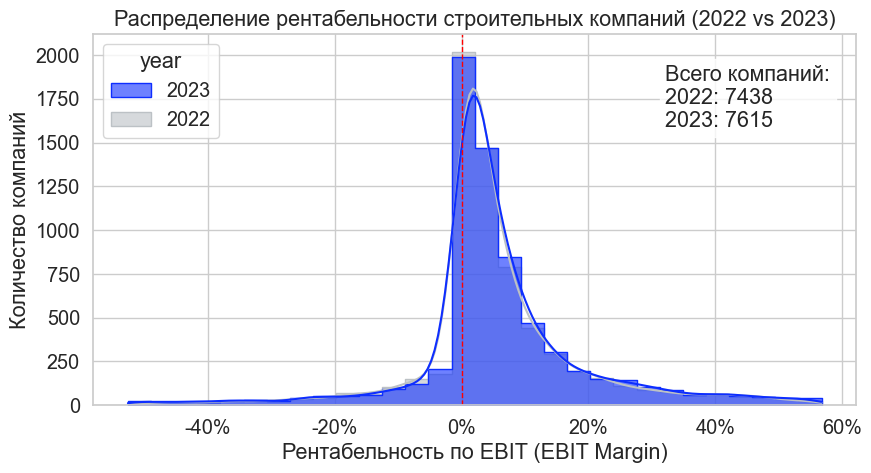

In [21]:
cleaned_df_22_23 = remove_outliers_percentile(df_22_23, 'EBIT Margin')
# Настройка стиля и создание графика
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(9, 5))
    ax = sns.histplot(
        data=cleaned_df_22_23,
        x='EBIT Margin',
        hue='year',
        bins=30,
        kde=True,
        alpha=0.6,
        palette=["#0e2eff","#bcc1c5" ],  
        element='step'  # Четкие границы столбцов
    )
    
    # Настройка осей и заголовка
    ax.set(
        xlabel='Рентабельность по EBIT (EBIT Margin)',
        ylabel='Количество компаний',
        title='Распределение рентабельности строительных компаний (2022 vs 2023)'
    )
    
    # Добавляем вертикальную линию для нулевой рентабельности
    plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
    
    # Форматирование оси X в процентах
    ax.set_xticklabels([f"{x:.0%}" for x in ax.get_xticks()])
    
    # Добавляем аннотацию с количеством компаний
    plt.text(
        x=0.75, y=0.75,
        s=f"Всего компаний:\n2022: {len(df_22_23[df_22_23['year']=='2022'])}\n2023: {len(df_22_23[df_22_23['year']=='2023'])}",
        transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.8)
    )

plt.tight_layout()
plt.show()

Распределение 2023 года примерно схоже с 2022. Однако, можно заметить, что за 2023 год распределние более сдвинуто вправо, что указывает на возрастающую тенденцию.

In [54]:
df_23_24 = ebit_df[ebit_df['year'].isin(['2023', '2024'])].copy()

# Удаление бесконечных значений (если income = 0)
df_23_24.replace([np.inf, -np.inf], np.nan, inplace=True)
df_23_24.dropna(subset=['EBIT Margin'], inplace=True)
df_23_24[df_23_24['year']=='2023'].describe()

,ID,income,interest_expense,operating_expenses,ebit,taxes,net_profit,EBIT Margin
count,7.615000e+03,7.615000e+03,7615.000000,7.615000e+03,7.615000e+03,7615.000000,7.615000e+03,7615.000000
mean,9.167727e+06,9.986148e+04,810.359554,8.560342e+04,6.856012e+03,-468.704268,5.744765e+03,-0.899346
std,3.212741e+06,4.074777e+05,12212.469764,3.391227e+05,7.949219e+04,10609.794103,5.666017e+04,24.787124
min,4.326000e+03,-2.102000e+03,-12472.000000,-1.168782e+06,-6.221540e+05,-478152.000000,-3.699540e+05,-1366.250000
25%,8.237341e+06,3.861500e+03,0.000000,2.879000e+03,3.600000e+01,-17.000000,2.300000e+01,0.005229
50%,1.034862e+07,1.652900e+04,0.000000,1.360700e+04,4.630000e+02,9.000000,3.260000e+02,0.033357
75%,1.153486e+07,6.805150e+04,0.000000,5.746300e+04,2.695500e+03,169.000000,2.018000e+03,0.109307
max,1.234494e+07,1.681267e+07,654770.000000,1.271706e+07,5.573521e+06,87298.000000,2.403174e+06,64.333333


In [55]:
df_23_24[df_23_24['year']=='2024'].describe()

,ID,income,interest_expense,operating_expenses,ebit,taxes,net_profit,EBIT Margin
count,7.298000e+03,7.298000e+03,7298.000000,7.298000e+03,7.298000e+03,7298.000000,7.298000e+03,7298.000000
mean,9.270891e+06,1.139454e+05,1414.693341,9.776852e+04,9.279504e+03,-348.473691,6.679802e+03,-6.726414
std,3.221138e+06,4.004209e+05,19715.070528,3.204288e+05,1.004113e+05,19417.224224,9.441754e+04,500.634308
min,4.326000e+03,-5.000000e+02,0.000000,-1.721100e+05,-1.017816e+06,-671904.000000,-1.750310e+06,-42663.000000
25%,8.345712e+06,4.745500e+03,0.000000,3.533750e+03,3.900000e+01,-19.000000,2.800000e+01,0.005095
50%,1.045892e+07,2.053250e+04,0.000000,1.693750e+04,5.890000e+02,14.000000,3.915000e+02,0.035596
75%,1.161509e+07,8.380175e+04,0.000000,7.043675e+04,3.664000e+03,231.000000,2.566750e+03,0.117555
max,1.261456e+07,1.954193e+07,865473.000000,1.245307e+07,5.602341e+06,719254.000000,4.312128e+06,1089.500000


По статистическим данным в идим, что межквартильный размах в 2024 году увеличился в сравнении с 2023 годом, медианное значение примерно осталось одинаковым (увеличилось на 0,2%). Увеличение межкварильного размаха может говорить об усилении дифференциации на рынке, возможно, в связи влиянием внешних факторов (санкционные ограничения, перегрев в экономике).

C:\Users\HP15s\AppData\Local\Temp\ipykernel_6624\3935545659.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{x:.0%}" for x in ax.get_xticks()])


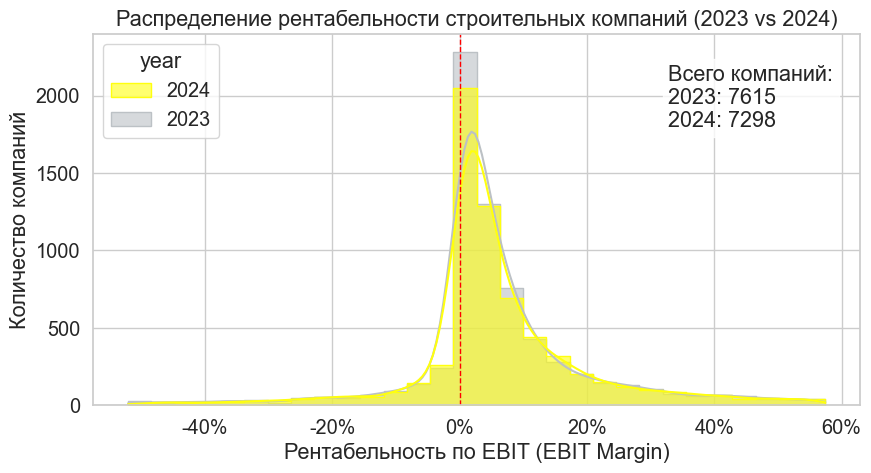

In [23]:
cleaned_df_23_24 = remove_outliers_percentile(df_23_24, 'EBIT Margin')
# Настройка стиля и создание графика
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(9, 5))
    ax = sns.histplot(
        data=cleaned_df_23_24,
        x='EBIT Margin',
        hue='year',
        bins=30,
        kde=True,
        alpha=0.6,
        palette=[ "#ffff0e","#bcc1c5"],  
        element='step'  # Четкие границы столбцов
    )
    
    # Настройка осей и заголовка
    ax.set(
        xlabel='Рентабельность по EBIT (EBIT Margin)',
        ylabel='Количество компаний',
        title='Распределение рентабельности строительных компаний (2023 vs 2024)'
    )
    
    # Добавляем вертикальную линию для нулевой рентабельности
    plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
    
    # Форматирование оси X в процентах
    ax.set_xticklabels([f"{x:.0%}" for x in ax.get_xticks()])
    
    # Добавляем аннотацию с количеством компаний
    plt.text(
        x=0.75, y=0.75,
        s=f"Всего компаний:\n2023: {len(df_23_24[df_23_24['year']=='2023'])}\n2024: {len(df_23_24[df_23_24['year']=='2024'])}",
        transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.8)
    )

plt.tight_layout()
plt.show()

По графику видно, что, в целом, распределение почти не изменилось (немного сместилось вправо), однако количество компаний уменьшилось.

In [24]:
ebit_df.replace([np.inf, -np.inf], np.nan, inplace=True)
ebit_df.dropna(subset=['EBIT Margin'], inplace=True)
trend_margin = ebit_df.groupby('year')['EBIT Margin'].describe()
print(trend_margin)

       count      mean         std           min       25%       50%  \
year                                                                   
2020  6281.0 -2.026216  135.959237 -10757.692308  0.004796  0.030938   
2021  6856.0  0.412752   90.160216  -1244.000000  0.004067  0.030231   
2022  7438.0 -0.758965   23.836301   -944.666667  0.004494  0.030664   
2023  7615.0 -0.899346   24.787124  -1366.250000  0.005229  0.033357   
2024  7298.0 -6.726414  500.634308 -42663.000000  0.005095  0.035596   

           75%          max  
year                         
2020  0.106772    39.904762  
2021  0.100447  7296.317460  
2022  0.104242   882.542373  
2023  0.109307    64.333333  
2024  0.117555  1089.500000  


Для большей наглядности была построена статистика по всем годам, где видно, что в 2021 году рентабельность уменьшилась (возможно, в связи с падением экономики из-за пандемийных огранинчений), потом идет незначительный рост показателя. 

Также были взяты на рассмотрение 2 макроэкономических параметра, чтобы рассмотреть влияние внешних макроэкономических факторов на показатель EBIT. Ими являются ключевая ставка в РФ и рост строительной отрасли за данный период. Что касается ключевой ставки, то для каждого года была рассчитана сревзвешанная ключевая ставка.
Данные взяты из:
- https://cbr.ru/hd_base/KeyRate/
- https://www.minstroyrf.gov.ru/press/obem-vvoda-zhilya-2020-goda-prevzoshel-itogovyy-pokazatel-2019-goda/
- https://rg.ru/2022/03/15/reg-cfo/stroitelstvo-zhilia-v-rossii-postavilo-istoricheskij-rekord.html
- https://www.interfax.ru/business/883428
- https://www.interfax.ru/business/1005114

In [25]:
macro = pd.DataFrame({
    'year': ['2020','2021','2022','2023','2024'],
    'construction_growth': [0.2, 12.6, 11, 7.5, -2.4], # % роста стройки в РФ
    'interest_rate': [5.08, 5.7, 9.64, 9.9, 17.42] # Ключевая ставка ЦБ
})
# Соединяем данные
analysis_df_ebit = trend.merge(macro, left_index=True, right_on='year')
# Корреляционный анализ
print(analysis_df_ebit.corr(method='pearson'))

                         mean    median     count      year  \
mean                 1.000000  0.739650  0.570353  0.921495   
median               0.739650  1.000000 -0.117604  0.463428   
count                0.570353 -0.117604  1.000000  0.820183   
year                 0.921495  0.463428  0.820183  1.000000   
construction_growth -0.599058 -0.921889  0.277305 -0.246380   
interest_rate        0.973167  0.676028  0.598476  0.927899   

                     construction_growth  interest_rate  
mean                           -0.599058       0.973167  
median                         -0.921889       0.676028  
count                           0.277305       0.598476  
year                           -0.246380       0.927899  
construction_growth             1.000000      -0.496631  
interest_rate                  -0.496631       1.000000  


На основе полученных значений можно заключить, что ключевая ставка сильно влияет на среднее значение EBIT, то есть получается, чем выше ключевая ставка, тем выше средняя прибыль строительных компаний. Это можно объяснить тем, что в периоды высокой ставки функционируют в основном только крупные игроки с высокой маржинальностью, т.е. остаются на рынке крупные игроки. Также, сильная отрицательная зависимость медианного значения EBIT от роста рынка, возможно, в связи с тем, что на рынок выходят малые компании, снижая таким образом средний показатель.

In [26]:
trend_ebit_margin=ebit_df.groupby('year')['EBIT Margin'].agg(['mean','median','count'])
analysis_df_ebit_margin = trend_ebit_margin.merge(macro, left_index=True, right_on='year')
# Корреляционный анализ
print(analysis_df_ebit_margin.corr(method='pearson'))

                         mean    median     count      year  \
mean                 1.000000 -0.846199 -0.086710 -0.609288   
median              -0.846199  1.000000  0.464064  0.864967   
count               -0.086710  0.464064  1.000000  0.823990   
year                -0.609288  0.864967  0.823990  1.000000   
construction_growth  0.865754 -0.668390  0.277796 -0.246380   
interest_rate       -0.838265  0.898241  0.603729  0.927899   

                     construction_growth  interest_rate  
mean                            0.865754      -0.838265  
median                         -0.668390       0.898241  
count                           0.277796       0.603729  
year                           -0.246380       0.927899  
construction_growth             1.000000      -0.496631  
interest_rate                  -0.496631       1.000000  


Видно, что среднее значение рентабельности имеет сильную прямую зависимость с ростом рынка (возможно, по причине того, что при росте рынка увеличивается спрос, который приводит к повышению выручки и снижению себестоимости за счёт эффекта от масштаба) и сильную обратную связь с ключевой ставкой, что можно объяснить тем, что малый бизнес в период высокой ставки может полусать очень низкую прибыли или же вообще не получать в связи с возможным ростом долговой нагрузки и высокой инфляцией. При этом медианное значение рентабельности имеет сильную прямую взаимосвзяь с ключевой ставкой, возможно, потому что крупные компании (определяющие медиану) перекладывают рост затрат на клиентов.

In [27]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\HP15s\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Для прогнозирования EBIT на основе данных была взята модель линейной регрессии, где факторами являются рост рынка и ключевая ставка (они имеют хорошую взаимосвязь с показателями).
Для прогнозирования EBIT были взяты данные прогнозов макроэкономических показателей из источников:
- https://ria.ru/20250725/stavka-2031400653.html
- https://sber.pro/publication/barometr-otrasli-stroitelstvo-i-nedvizhimost-trendi-2025-goda/

In [28]:
from sklearn.linear_model import LinearRegression

# Готовим данные
X = analysis_df_ebit[['construction_growth','interest_rate']][:-1] # Все кроме текущего года
y = analysis_df_ebit['mean'][1:] # Сдвиг на год вперед

model = LinearRegression().fit(X,y)
print(f"R² = {model.score(X,y):.2f}")
print("2025 прогноз:", model.predict([[4.0, 19.0]])[0])
print(f"EBIT = {model.coef_[0]:.2f}*construction + {model.coef_[1]:.2f}*rate + {model.intercept_:.2f}")


R² = 0.79
2025 прогноз: 11520.95764517544
EBIT = 25.56*construction + 653.38*rate + -995.51


C:\Users\HP15s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Коэффициент детрминации равен 79%, что означает, что модель объясняет 79% изменчивости EBIT на основе роста строительства и ключевой ставки (что является хорошим показателем). В итоге, на основе модели прогнозируется EBIT равный примерно 11521 тыс. руб.

Таким образом, на основе показателя EBIT и рентабельности по EBIT можно сказать, что строительная отрасль является рискованной для малого и среднего бизнеса, так как при повышении ключевой ставки растет дифференциация между крупными и маленькими игроками и становится очень сложно удержаться на рынке, то есть рынок очень зависим от монетарной политики, что делает его уязвимым.

Далее, построим график роста чисто прибыли компани рынка за 4 года.

In [ ]:
df_net_profit = ebit_df[['ID', 'year', 'net_profit']]

# Фильтруем данные за 2021-2024 годы
df = df_net_profit[df_net_profit['year'].astype(int).between(2021, 2024)]

# Находим самый ранний год для каждой компании
base_year = df_net_profit.groupby('ID')['year'].min().reset_index()
base_year.columns = ['ID', 'base_year']

# Объединяем с исходными данными
merged_df = pd.merge(df_net_profit, base_year, on='ID')

# Создаем DataFrame с базовыми значениями (4-летняя давность)
base_df = merged_df[merged_df['year'] == merged_df['base_year']][['ID', 'net_profit']]
base_df.columns = ['ID', 'base_net_profit']

# Создаем DataFrame с текущими значениями
current_df = merged_df[merged_df['year'] == '2024'][['ID', 'net_profit']]
current_df.columns = ['ID', 'current_net_profit']

# Объединяем базовые и текущие значения
growth_df = pd.merge(base_df, current_df, on='ID', how='inner')

# Рассчитываем процент роста
growth_df['growth_percent'] = np.where(
    growth_df['base_net_profit'] != 0,
    ((growth_df['current_net_profit'] - growth_df['base_net_profit']) / 
     growth_df['base_net_profit'].abs()) * 100,
    np.nan
)

# Удаляем бесконечные значения и NaN
growth_df = growth_df.replace([np.inf, -np.inf], np.nan).dropna(subset=['growth_percent'])

# Округляем до целых процентов
growth_df['growth_rounded'] = growth_df['growth_percent'].round().astype(int)
growth_df



,ID,base_net_profit,current_net_profit,growth_percent,growth_rounded
0,12221241,221.0,305.0,38.009050,38
2,11291265,54.0,5243.0,9609.259259,9609
3,12416555,43.0,43.0,0.000000,0
4,1080874,218.0,6004.0,2654.128440,2654
5,9791281,-1526.0,559.0,136.631717,137
...,...,...,...,...,...
7293,11857639,444.0,98.0,-77.927928,-78
7294,12238553,342.0,-100083.0,-29364.035088,-29364
7295,11953979,58.0,374.0,544.827586,545
7296,7950107,734.0,218.0,-70.299728,-70


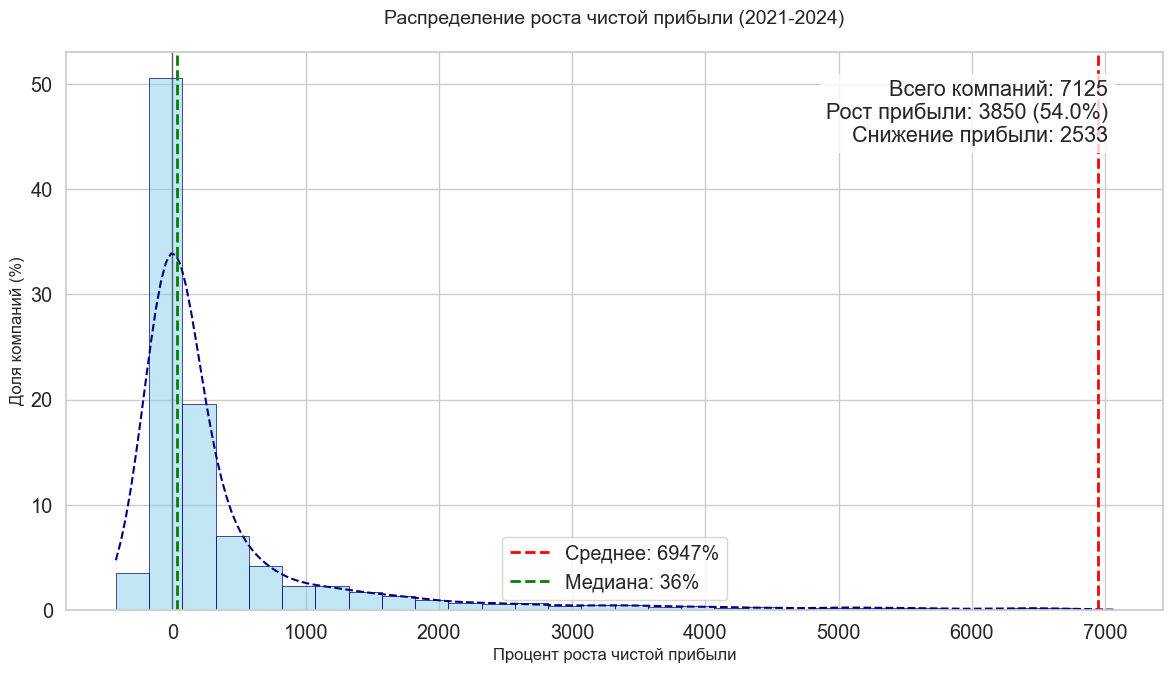

In [ ]:
cleaned_growth=remove_outliers_percentile(growth_df, 'growth_rounded')
# Построение графика
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Гистограмма 
ax = sns.histplot(
    data=cleaned_growth,
    x='growth_rounded',
    bins=30,
    kde=True,
    color='skyblue',
    edgecolor='navy',
    linewidth=0.5,
    stat='percent'
)
ax.lines[0].set_color('navy')
ax.lines[0].set_linestyle('--')

# Вертикальные линии для ключевых точек
mean_growth = growth_df['growth_rounded'].mean()
median_growth = growth_df['growth_rounded'].median()

plt.axvline(x=mean_growth, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_growth:.0f}%')
plt.axvline(x=median_growth, color='green', linestyle='--', linewidth=2, label=f'Медиана: {median_growth:.0f}%')
plt.axvline(x=0, color='black', linewidth=1, alpha=0.5)

# Настройки отображения
plt.title('Распределение роста чистой прибыли (2021-2024)', pad=20, fontsize=14)
plt.xlabel('Процент роста чистой прибыли', fontsize=12)
plt.ylabel('Доля компаний (%)', fontsize=12)
plt.legend()

# Аннотации
total_companies = len(growth_df)
positive_growth = len(growth_df[growth_df['growth_rounded'] > 0])
negative_growth = len(growth_df[growth_df['growth_rounded'] < 0])

plt.text(
    x=0.95, y=0.95,
    s=f"Всего компаний: {total_companies}\n"
      f"Рост прибыли: {positive_growth} ({positive_growth/total_companies:.1%})\n"
      f"Снижение прибыли: {negative_growth}",
    transform=ax.transAxes,
    ha='right',
    va='top',
    bbox=dict(facecolor='white', alpha=0.8))
    
plt.tight_layout()
plt.show()


По графику видно, что среднее значение (6947%) значительно превышает медиану (36%), что указывает на неравномерное распределение прибыли среди компаний.Это означает, что небольшая группа компаний добилась сверхвысоких результатов, исказив средний показатель.
Большинство компаний показали рост,  54% компаний увеличили прибыль, что говорит о стабильности отрасли даже в условиях экономической нестабильности.Однако 35.6% компаний столкнулись со снижением прибыли, что может быть связано либо с ростом затрат на стройматериалы и кредиты, либо с ужесточением конкуренции. Медианный рост (36%) отражает, что типичная компания в отрасли увеличила прибыль на 36% за 4 года (около 8% годовых).

Таким образом, строительная отрасль демонстрирует умеренный рост (медиана +36%), но с крайней неравномерностью (среднее +6,947%).Перспективна для компаний с диверсифицированными проектами и доступом к господдержке. Рискована для малого бизнеса из-за высокой конкуренции и затрат.

In [32]:
pip install geopandas matplotlib geopy folium



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\HP15s\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [33]:
address_data={}

def format_address(org_info):
    address_parts = []
    
    # Добавляем улицу и дом
    if org_info.get('street'):
        street = f"ул. {org_info['street'].title()}"
        if org_info.get('house'):
            street += f", д. {org_info['house']}"
        address_parts.append(street)
    
    # Добавляем корпус/офис если есть
    if org_info.get('building'):
        address_parts.append(f"корп. {org_info['building']}")
    if org_info.get('office'):
        address_parts.append(f"кв. {org_info['office']}")
    
    # Добавляем город/населенный пункт
    if org_info.get('city'):
        address_parts.append(f"г. {org_info['city'].title()}")
    elif org_info.get('settlement'):
        address_parts.append(f"п. {org_info['settlement'].title()}")
    
    # Добавляем регион и страну
    if org_info.get('region'):
        address_parts.append(org_info['region'].title())
    address_parts.append("Россия")
    
    return ", ".join(filter(None, address_parts))

bfo_url = f"https://bo.nalog.gov.ru/nbo/organizations/{org_id}/bfo"
org_url = f"https://bo.nalog.gov.ru/nbo/organizations/{org_id}"
    
for org_id in id_list:    
    try:
        response = session.get(org_url)
        response.raise_for_status()
        org_info = response.json()

        response = session.get(bfo_url)
        response.raise_for_status()
        bfo_data = response.json()

        # Форматируем адрес
        formatted_address = format_address(org_info)

        # Получаем последние доступные финансовые данные
        if bfo_data:
            latest_year = bfo_data[0]
        
            try:
                financials_2024 = latest_year['typeCorrections'][0]['correction']['financialResult']
                income_2024=financials_2024.get('current2110', 0)
                
            except (KeyError, IndexError) as e:
                print(f"Ошибка при обработке года для организации {org_id}: {e}")
        
        else:
            income_2024=None
        
        # Если есть данные по выручке, сохраняем результаты
        if income_2024 and formatted_address:
            
            org_info = latest_year.get('organizationInfo', {}) or {}
            
            # Сохраняем все данные по организации
            address_data[org_id] = {
                'company_name': org_info.get('fullName', 'Название не указано'),
                'inn': org_info.get('inn', 'ИНН не указан'),
                "address": formatted_address,
                'income_2024': income_2024
            }
            
    except requests.exceptions.RequestException as e:
        print(f"Ошибка при запросе данных для организации {org_id}: {e}")
    except json.JSONDecodeError:
        print(f"Ошибка декодирования JSON для организации {org_id}")
    except Exception as e:
        print(f"Неизвестная ошибка при обработке организации {org_id}: {str(e)}")



In [34]:
address_data

{12221241: {'company_name': 'ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "АРСЕНАЛ СТРОЙ"',
  'inn': '2724199698',
  'address': 'ул. Кочнева, д. 14Е, кв. I (1-4), г. Хабаровск, Хабаровский, Россия',
  'income_2024': 245188.0},
 4716825: {'company_name': 'ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "АРСЕНАЛ СТРОЙ"',
  'inn': '2724199698',
  'address': 'ул. Кочнева, д. 14Е, кв. I (1-4), г. Хабаровск, Хабаровский, Россия',
  'income_2024': 245188.0},
 9987935: {'company_name': 'ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "АРСЕНАЛ СТРОЙ"',
  'inn': '2724199698',
  'address': 'ул. Кочнева, д. 14Е, кв. I (1-4), г. Хабаровск, Хабаровский, Россия',
  'income_2024': 245188.0},
 10111834: {'company_name': 'ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "АРСЕНАЛ СТРОЙ"',
  'inn': '2724199698',
  'address': 'ул. Кочнева, д. 14Е, кв. I (1-4), г. Хабаровск, Хабаровский, Россия',
  'income_2024': 245188.0},
 5920164: {'company_name': 'ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "АРСЕНАЛ СТРОЙ"',
  'inn': '2724199698',


In [35]:

address_df = pd.DataFrame.from_dict(address_data, orient='index').reset_index()
address_df = address_df.rename(columns={'index': 'ID'})

(address_df)

,ID,company_name,inn,address,income_2024
0,12221241,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АРСЕ...",2724199698,"ул. Кочнева, д. 14Е, кв. I (1-4), г. Хабаровск...",245188.0
1,4716825,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АРСЕ...",2724199698,"ул. Кочнева, д. 14Е, кв. I (1-4), г. Хабаровск...",245188.0
2,9987935,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АРСЕ...",2724199698,"ул. Кочнева, д. 14Е, кв. I (1-4), г. Хабаровск...",245188.0
3,10111834,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АРСЕ...",2724199698,"ул. Кочнева, д. 14Е, кв. I (1-4), г. Хабаровск...",245188.0
4,5920164,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АРСЕ...",2724199698,"ул. Кочнева, д. 14Е, кв. I (1-4), г. Хабаровск...",245188.0
...,...,...,...,...,...
13410,11953979,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АРСЕ...",2724199698,"ул. Кочнева, д. 14Е, кв. I (1-4), г. Хабаровск...",245188.0
13411,7950107,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АРСЕ...",2724199698,"ул. Кочнева, д. 14Е, кв. I (1-4), г. Хабаровск...",245188.0
13412,8518457,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АРСЕ...",2724199698,"ул. Кочнева, д. 14Е, кв. I (1-4), г. Хабаровск...",245188.0
13413,11663999,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АРСЕ...",2724199698,"ул. Кочнева, д. 14Е, кв. I (1-4), г. Хабаровск...",245188.0


In [36]:
top500=address_df.sort_values('income_2024', ascending=False).head(500)
top500

,ID,company_name,inn,address,income_2024
0,12221241,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АРСЕ...",2724199698,"ул. Кочнева, д. 14Е, кв. I (1-4), г. Хабаровск...",245188.0
1,4716825,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АРСЕ...",2724199698,"ул. Кочнева, д. 14Е, кв. I (1-4), г. Хабаровск...",245188.0
2,9987935,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АРСЕ...",2724199698,"ул. Кочнева, д. 14Е, кв. I (1-4), г. Хабаровск...",245188.0
3,10111834,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АРСЕ...",2724199698,"ул. Кочнева, д. 14Е, кв. I (1-4), г. Хабаровск...",245188.0
4,5920164,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АРСЕ...",2724199698,"ул. Кочнева, д. 14Е, кв. I (1-4), г. Хабаровск...",245188.0
...,...,...,...,...,...
495,11692276,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АРСЕ...",2724199698,"ул. Кочнева, д. 14Е, кв. I (1-4), г. Хабаровск...",245188.0
496,11332567,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АРСЕ...",2724199698,"ул. Кочнева, д. 14Е, кв. I (1-4), г. Хабаровск...",245188.0
497,11299491,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АРСЕ...",2724199698,"ул. Кочнева, д. 14Е, кв. I (1-4), г. Хабаровск...",245188.0
498,11548025,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АРСЕ...",2724199698,"ул. Кочнева, д. 14Е, кв. I (1-4), г. Хабаровск...",245188.0


In [37]:
from geopy.geocoders import Nominatim
import time

geolocator = Nominatim(user_agent="construction_companies_map")

def get_coordinates(address):
    try:
        location = geolocator.geocode(address + ', Россия')
        return (location.latitude, location.longitude) if location else (None, None)
    except:
        return (None, None)

# Добавление координат
top500['coordinates'] = top500['address'].apply(get_coordinates)
top500[['lat', 'lon']] = pd.DataFrame(top500['coordinates'].tolist(), index=top500.index)

In [42]:
top500

,ID,company_name,inn,address,income_2024,coordinates,lat,lon
0,12221241,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АРСЕ...",2724199698,"ул. Кочнева, д. 14Е, кв. I (1-4), г. Хабаровск...",245188.0,"(None, None)",None,None
1,4716825,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АРСЕ...",2724199698,"ул. Кочнева, д. 14Е, кв. I (1-4), г. Хабаровск...",245188.0,"(None, None)",None,None
2,9987935,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АРСЕ...",2724199698,"ул. Кочнева, д. 14Е, кв. I (1-4), г. Хабаровск...",245188.0,"(None, None)",None,None
3,10111834,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АРСЕ...",2724199698,"ул. Кочнева, д. 14Е, кв. I (1-4), г. Хабаровск...",245188.0,"(None, None)",None,None
4,5920164,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АРСЕ...",2724199698,"ул. Кочнева, д. 14Е, кв. I (1-4), г. Хабаровск...",245188.0,"(None, None)",None,None
...,...,...,...,...,...,...,...,...
495,11692276,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АРСЕ...",2724199698,"ул. Кочнева, д. 14Е, кв. I (1-4), г. Хабаровск...",245188.0,"(None, None)",None,None
496,11332567,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АРСЕ...",2724199698,"ул. Кочнева, д. 14Е, кв. I (1-4), г. Хабаровск...",245188.0,"(None, None)",None,None
497,11299491,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АРСЕ...",2724199698,"ул. Кочнева, д. 14Е, кв. I (1-4), г. Хабаровск...",245188.0,"(None, None)",None,None
498,11548025,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АРСЕ...",2724199698,"ул. Кочнева, д. 14Е, кв. I (1-4), г. Хабаровск...",245188.0,"(None, None)",None,None


Не понимаю, почему не получается найти координаты ((